## End-to-End Pipeline for Machine Learning: Regression

In [1]:
# foundational modules
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt 
import matplotlib.figure as fig 
from matplotlib import pyplot
import seaborn as sns
sns.set(style="darkgrid")

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

# English Stopwords
from nltk.corpus import stopwords
nltk.download("stopwords")

# German Stopwords
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import string

import scipy.stats as stats
import sklearn
import statsmodels.api as sm

# data preparation for model learning
from sklearn.model_selection import train_test_split

# model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#Model Assessment
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def _syllables(word):
    syllable_count = 0
    vowels = 'aeiouy'
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Step-1: Load and Examine the Data Set

In [2]:
df = pd.read_csv("data_to_train.csv")
df.head()

,word_count,char_count,sly_count,level
0,64,567,182,3
1,11,85,27,2
2,9,63,22,2
3,5,44,16,3
4,12,94,32,2


In [3]:
df['score'] = 0
for i in range(df.shape[0]):
    if df['word_count'][i] > 0:
        df['score'][i] = 206.835 - 1.015*(df['word_count'][i])-84.6*(df['sly_count'][i]/df['word_count'][i])    
    if df['word_count'][i] <= 0:
        df['score'][i] = 1000000    
min_score = min(df['score'])
df['updated_score'] = 0
for i in range(df.shape[0]):
    if min_score >= 0:
        df['updated_score'][i] = df['score'][i]    
    if min_score < 0:
        df['updated_score'][i] = abs(min_score) + df['score'][i]    
updated_score_range = max(df['updated_score']) - min(df['updated_score']) 
df['complexity_index'] = 0.00
for i in range(df.shape[0]):
    df['complexity_index'][i] = 1-df['updated_score'][i]/updated_score_range
df.drop(['level', 'score', 'updated_score'], axis=1, inplace=True)
df.rename(columns = {'complexity_index':'level'}, inplace = True)
df.head()

<ipython-input-3-33bbebfb79b8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complexity_index'][i] = 1-df['updated_score'][i]/updated_score_range


,word_count,char_count,sly_count,level
0,64,567,182,0.784946
1,11,85,27,0.473118
2,9,63,22,0.465950
3,5,44,16,0.677419
4,12,94,32,0.541219


In [4]:
df.shape

(2300, 4)

In [5]:
df.describe()

,word_count,char_count,sly_count,level
count,2300.000000,2300.000000,2300.000000,2300.000000
mean,9.480435,63.553478,19.816087,0.310982
std,7.672735,58.289368,18.045918,0.178271
min,1.000000,1.000000,1.000000,0.000000
25%,3.750000,20.000000,6.000000,0.197133
50%,8.000000,54.000000,17.000000,0.326165
75%,14.000000,94.000000,29.000000,0.433692
max,126.000000,1198.000000,353.000000,1.000000


### Step-2: Split Data into Train, Validation, and Test Data Sets

In [6]:
X = pd.DataFrame(np.c_[df['word_count'],df['char_count'],df['sly_count']], columns = ['word_count','char_count','sly_count'])
y = df['level']

In [7]:
print(X.shape)
print(y.shape)

(2300, 3)
(2300,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)
print ("Training (X_train and y_train): \t", X_train.shape, " \t", y_train.shape)
print ("Validation (X_val and y_val): \t", X_val.shape, " \t", y_val.shape)
print ("Testing (X_test and y_test): \t\t", X_test.shape, "  \t", y_test.shape)

Training (X_train and y_train): 	 (1380, 3)  	 (1380,)
Validation (X_val and y_val): 	 (460, 3)  	 (460,)
Testing (X_test and y_test): 		 (460, 3)   	 (460,)


### Step-3: Define the Parameters for Single Model Regression and Fit the Model

In [9]:
#Fitting Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [10]:
#Fitting KNeighbors Regression Model
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [11]:
#Fitting Decision Tree Regression Model
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
#Fitting Support Vector Regression (SVR) Model
SVR = SVR(gamma='auto')
SVR.fit(X_train, y_train)

SVR(gamma='auto')

In [13]:
#Fitting AdaBoost Regression Model
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(X_train, y_train)

AdaBoostRegressor()

In [14]:
#Fitting Gradient Boosting Regression Model
GradientBoost = GradientBoostingRegressor()
GradientBoost.fit(X_train, y_train)

GradientBoostingRegressor()

In [15]:
#Fitting Random Forest Regression Model
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

RandomForestRegressor()

### Step-4: Report Performance Metrics for the Training, Validation and Test Data

In [16]:
print("Linear Regression Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(LR.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(LR.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(LR.score(X_test, y_test)))

Linear Regression Performance:
	TRAIN Accuracy: 0.61
	VALIDATION Accuracy: 0.41
	TEST Accuracy: -0.24


In [17]:
print("KNN Regression Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(KNN.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(KNN.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(KNN.score(X_test, y_test)))

KNN Regression Performance:
	TRAIN Accuracy: 0.93
	VALIDATION Accuracy: 0.92
	TEST Accuracy: 0.87


In [18]:
print("Decision Tree Regression Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(DT.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(DT.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(DT.score(X_test, y_test)))

Decision Tree Regression Performance:
	TRAIN Accuracy: 1.00
	VALIDATION Accuracy: 0.99
	TEST Accuracy: 0.97


In [19]:
print("Support Vector Regression Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(SVR.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(SVR.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(SVR.score(X_test, y_test)))

Support Vector Regression Performance:
	TRAIN Accuracy: 0.82
	VALIDATION Accuracy: 0.72
	TEST Accuracy: 0.75


In [20]:
print("AdaBoost Regression Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(AdaBoost.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(AdaBoost.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(AdaBoost.score(X_test, y_test)))

AdaBoost Regression Performance:
	TRAIN Accuracy: 0.74
	VALIDATION Accuracy: 0.72
	TEST Accuracy: 0.73


In [21]:
print("Gradient Boost Regression Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(GradientBoost.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(GradientBoost.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(GradientBoost.score(X_test, y_test)))

Gradient Boost Regression Performance:
	TRAIN Accuracy: 0.98
	VALIDATION Accuracy: 0.97
	TEST Accuracy: 0.95


In [22]:
print("Random Forest Performance:")
print ("\tTRAIN Accuracy: {:.2f}".format(RandomForest.score(X_train, y_train)))
print ("\tVALIDATION Accuracy: {:.2f}".format(RandomForest.score(X_val, y_val)))
print ("\tTEST Accuracy: {:.2f}".format(RandomForest.score(X_test, y_test)))

Random Forest Performance:
	TRAIN Accuracy: 1.00
	VALIDATION Accuracy: 0.99
	TEST Accuracy: 0.97


### Select the Best Model

In [23]:
predictionsValidate = DT.predict(X_val)
print("[INFO] MSE : {}".format(round(mean_squared_error(y_val, predictionsValidate), 3)))
predictionsTest = DT.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(y_test, predictionsTest), 3)))

[INFO] MSE : 0.0
[INFO] MSE : 0.001


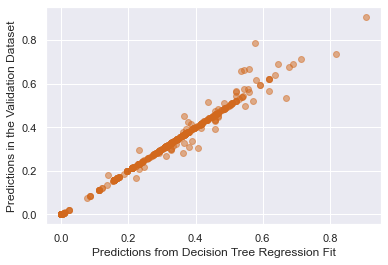

In [24]:
plt.scatter(predictionsValidate, y_val, alpha=0.5,color='chocolate')
plt.xlabel('Predictions from Decision Tree Regression Fit')
plt.ylabel('Predictions in the Validation Dataset')
plt.show()

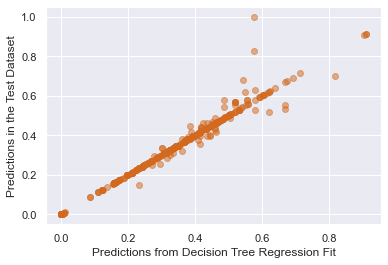

In [25]:
plt.scatter(predictionsTest, y_test, alpha=0.5,color='chocolate')
plt.xlabel('Predictions from Decision Tree Regression Fit')
plt.ylabel('Predictions in the Test Dataset')
plt.show()

In [26]:
predictionsValidate = GradientBoost.predict(X_val)
print("[INFO] MSE : {}".format(round(mean_squared_error(y_val, predictionsValidate), 3)))
predictionsTest = GradientBoost.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(y_test, predictionsTest), 3)))

[INFO] MSE : 0.001
[INFO] MSE : 0.002


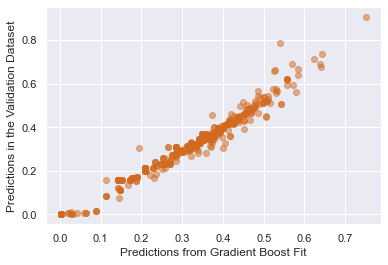

In [27]:
plt.scatter(predictionsValidate, y_val, alpha=0.5,color='chocolate')
plt.xlabel('Predictions from Gradient Boost Fit')
plt.ylabel('Predictions in the Validation Dataset')
plt.show()

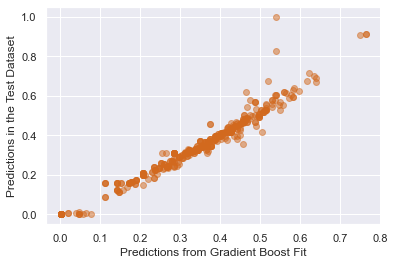

In [28]:
plt.scatter(predictionsTest, y_test, alpha=0.5,color='chocolate')
plt.xlabel('Predictions from Gradient Boost Fit')
plt.ylabel('Predictions in the Test Dataset')
plt.show()

In [29]:
predictionsValidate = RandomForest.predict(X_val)
print("[INFO] MSE : {}".format(round(mean_squared_error(y_val, predictionsValidate), 3)))
predictionsTest = RandomForest.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(y_test, predictionsTest), 3)))

[INFO] MSE : 0.0
[INFO] MSE : 0.001


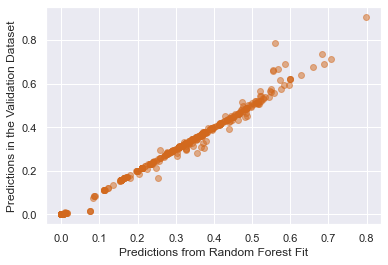

In [30]:
plt.scatter(predictionsValidate, y_val, alpha=0.5,color='chocolate')
plt.xlabel('Predictions from Random Forest Fit')
plt.ylabel('Predictions in the Validation Dataset')
plt.show()

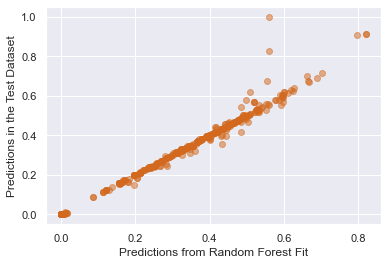

In [31]:
plt.scatter(predictionsTest, y_test, alpha=0.5,color='chocolate')
plt.xlabel('Predictions from Random Forest Fit')
plt.ylabel('Predictions in the Test Dataset')
plt.show()

### Step-6: Predict the Level of Complexity of a Given Sentence

In [32]:
user = """I love running."""
user_string = user.translate(str.maketrans('', '', string.punctuation))
sent_tokenize(user_string)
user_words = word_tokenize(user_string)
user_list = [word for word in user_words if not word in stopwords.words()]
user_word_count = len(user_list)
user_char_count = 0
for word in user_list:
    user_char_count = user_char_count + len(word)
user_sly_count = 0
for word in user_list:
    user_sly_count = user_sly_count + _syllables(word)
user_data = [[user_word_count, user_char_count,user_sly_count]]
X = pd.DataFrame(user_data, columns = ['word_count', 'char_count', 'sly_count'])

In [33]:
MyPrediction = GradientBoost.predict(X)
MyPrediction[0]

0.14653715501225156

### Step-7: Predict the Level of Complexity of a Given German Sentence

In [34]:
german_stop_words = stopwords.words('german')

In [35]:
# Enter the words known by the user
known_words = pd.read_csv("words_known_by_user.csv")
known_words_list = known_words['user_known'].to_list()

In [36]:
user = """"Nein, der alte Mann kommt nicht nach Hause."""
user_string = user.translate(str.maketrans('', '', string.punctuation))
sent_tokenize(user_string)
user_words = word_tokenize(user_string)
user_list = [word for word in user_words if not word in german_stop_words]
user_unknown_list = [word for word in user_list if not word in known_words_list]
user_word_count = len(user_unknown_list)
user_char_count = 0
for word in user_unknown_list:
    user_char_count = user_char_count + len(word)
user_sly_count = 0
for word in user_unknown_list:
    user_sly_count = user_sly_count + _syllables(word)
user_data = [[user_word_count, user_char_count,user_sly_count]]
X = pd.DataFrame(user_data, columns = ['word_count', 'char_count', 'sly_count'])

In [37]:
MyPrediction = GradientBoost.predict(X)
MyPrediction[0]

0.08097068247072206

In [38]:
#Add the user_unknown_list to the words known by the user
known_words_list.extend(user_unknown_list)
print(known_words_list)

['Baum', 'Verstehen', 'Uberrascht', 'Aufgeben', 'Lehrbuch', 'Schon', 'Verruckt', 'Kasserolle', 'Schildkrote', 'Umgebung', 'Wissenschaft', 'Geschichte', 'Mathematik', 'Brille', 'Hausschuhe', 'Vergeben', 'Zeitplan', 'Verschwommen', 'Schwimmer', 'Ruderer', 'Nein', 'alte', 'Mann', 'kommt', 'Hause']
